In [1]:
# Librerias necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carga de los datos de calidad del aire.
data_tetuan = pd.read_csv("Datos_CalidadAire_Tetuan.csv")
data_estaciones = pd.read_csv("Datos_CalidadAire_Estaciones.csv")

In [3]:
# Se quitan las columnas de tipo de dato.
data_tetuan = data_tetuan.iloc[:, [0, 1, 3, 5]]
data_estaciones = data_estaciones.iloc[:, [0, 1, 3, 5]]

# Primeras lineas de uno de los datasets.
data_tetuan.head(5)

,Fecha,PM10(µg/m³),NO2(µg/m³),CO(mg/m³)
0,01-01-2022,22,13,0.5
1,02-01-2022,23,13,0.4
2,03-01-2022,16,16,0.4
3,04-01-2022,-,9,0.3
4,05-01-2022,11,22,0.5


In [6]:
# Se cambia la fecha a formato datetime.
data_tetuan["Fecha"] = pd.to_datetime(data_tetuan["Fecha"], format = "mixed")
data_estaciones["Fecha"] = pd.to_datetime(data_estaciones["Fecha"], format = "mixed")

In [9]:
# Se eliminan los - y se sustituyen por nan por el momento y se transforma a float.
data_tetuan.iloc[:, 1] = data_tetuan.iloc[:, 1].str.replace("-", "nan").astype(float)
data_tetuan.iloc[:, 2] = data_tetuan.iloc[:, 2].str.replace("-", "nan").astype(float)
data_tetuan.iloc[:, 3] = data_tetuan.iloc[:, 3].str.replace("-", "nan").astype(float)
data_estaciones.iloc[:, 1] = data_estaciones.iloc[:, 1].str.replace("-", "nan").astype(float)
data_estaciones.iloc[:, 2] = data_estaciones.iloc[:, 2].str.replace("-", "nan").astype(float)
data_estaciones.iloc[:, 3] = data_estaciones.iloc[:, 3].str.replace("-", "nan").astype(float)

In [12]:
# Se reemplazan los nan por la media.
data_tetuan.iloc[:, 1].fillna(data_tetuan.iloc[:, 1].mean(), inplace = True)
data_tetuan.iloc[:, 2].fillna(data_tetuan.iloc[:, 2].mean(), inplace = True)
data_tetuan.iloc[:, 3].fillna(data_tetuan.iloc[:, 3].mean(), inplace = True)
data_estaciones.iloc[:, 1].fillna(data_estaciones.iloc[:, 1].mean(), inplace = True)
data_estaciones.iloc[:, 2].fillna(data_estaciones.iloc[:, 2].mean(), inplace = True)
data_estaciones.iloc[:, 3].fillna(data_estaciones.iloc[:, 3].mean(), inplace = True)

In [15]:
# Quitamos las filas con fechas no presentes en trafico
df_tetuan = data_tetuan[~((data_tetuan.Fecha <= "2022-09-17") & (data_tetuan.Fecha >= "2022-09-01"))]
df_estaciones = data_estaciones[~((data_estaciones.Fecha <= "2022-09-17") & (data_estaciones.Fecha >= "2022-09-01"))]

In [18]:
# Quitamos la columna fecha
df_tetuan = df_tetuan.iloc[:, [1, 2, 3]]
df_estaciones = df_estaciones.iloc[:, [1, 2, 3]]

In [21]:
# Exportamos
df_tetuan.to_csv("Predictandos_tetuan.csv")
df_estaciones.to_csv("Predictandos_estaciones.csv")

array([<Axes: xlabel='Fecha'>, <Axes: xlabel='Fecha'>,
       <Axes: xlabel='Fecha'>], dtype=object)

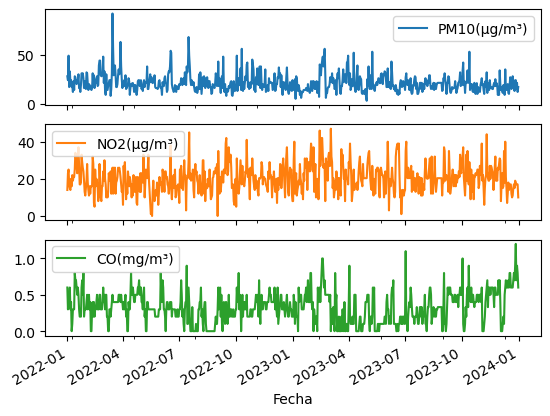

In [22]:
# Plot serie temporal calidad del aire estaciones.
data_estaciones.plot(subplots = True, x = "Fecha")